<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 4 Bis2 - Colaborativo

#### Ana Nuñez y Santiago Palozzo


# Consigna

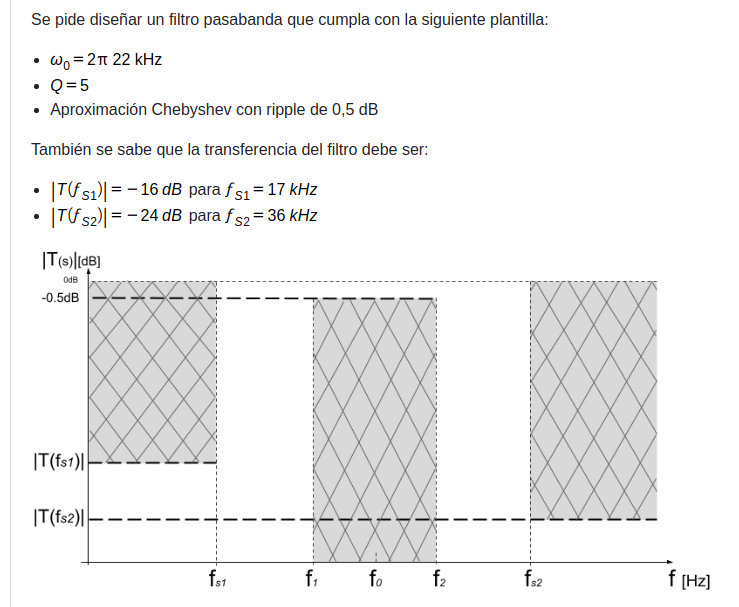

👉  Obtener la plantilla de diseño pasabanda normalizada

👉  Obtener la función transferencia normalizada del prototipo pasabajo que satisfaga el requerimiento del filtro pasabanda.

👉  Obtener la transferencia pasabanda normalizada

👉  Implementar mediante secciones pasivas separadas por seguidores de tensión activos.

👉  Activar las redes pasivas mediante la red propuesta aquí debajo y comprobar mediante simulación el comportamiento deseado.

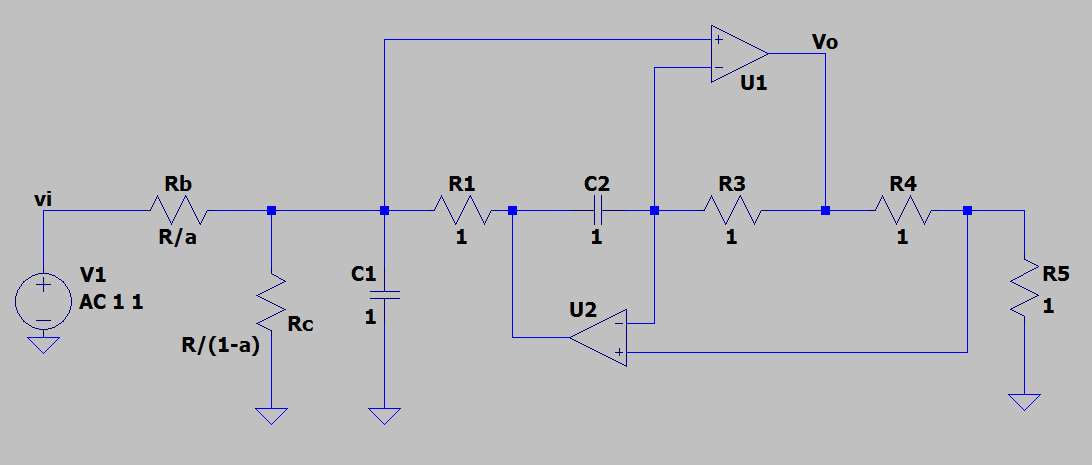

# Distribución y organización del trabajo

Dado que ambos estabamos al día con la materia, consideramos que lo mejor sería realizar el desarrollo por separado, a modo de práctica, y luego ponerlo en común.



# Desarrollo analítico

A continuacíon se adjuntan ambos desarrollos, primero el de Santiago Palozzo, el cual es puramente analítico, y luego el de Ana Nuñez, acompañado de una simulación en Python

In [4]:
from IPython.display import IFrame
IFrame("./TS4BIS.pdf", width=1000, height=1000)

In [ ]:
from IPython.display import IFrame
IFrame("./TS4BIS.pdf", width=1000, height=1000)

# Simulación numérica circuital

HLP(s): 


<IPython.core.display.Math object>

zLP =  [] 
 pLP =  [-0.31322824+1.02192749j -0.62645649-0.j         -0.31322824-1.02192749j] 
 kLP = 0.7156937903107974


HBP(s): 


<IPython.core.display.Math object>

zBP =  [0. 0. 0.] 
 pBP =  [-0.03450874+1.10691778j -0.03450874-1.10691778j -0.06264565+0.99803583j
 -0.06264565-0.99803583j -0.02813691+0.90253228j -0.02813691-0.90253228j] 
 kBP = 0.005725550322486381


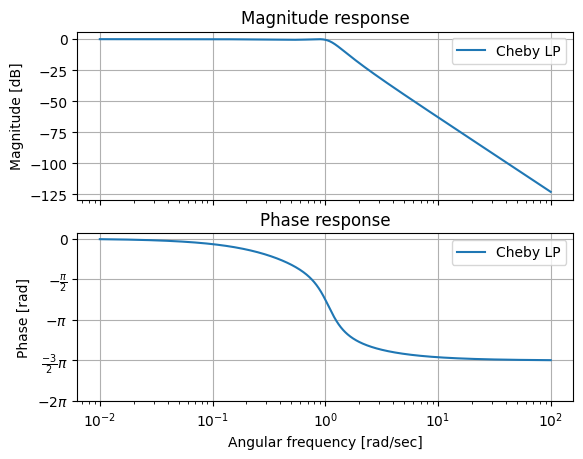

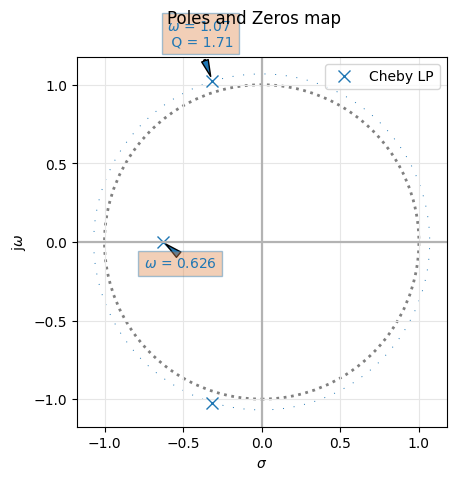

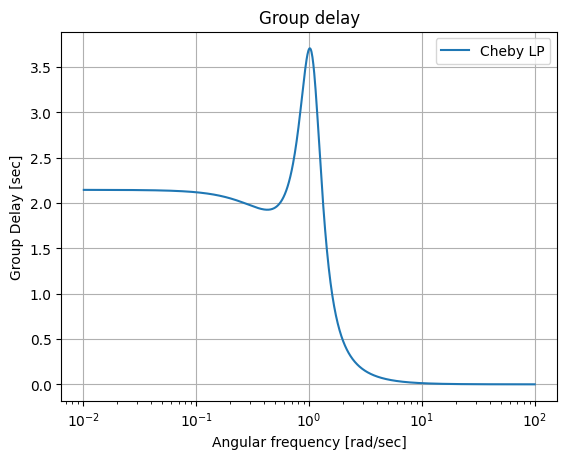

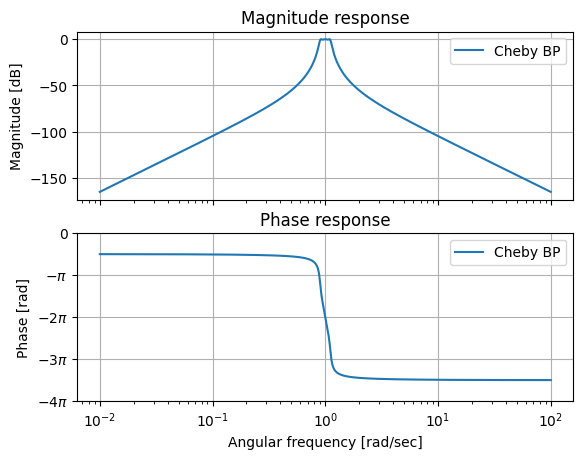

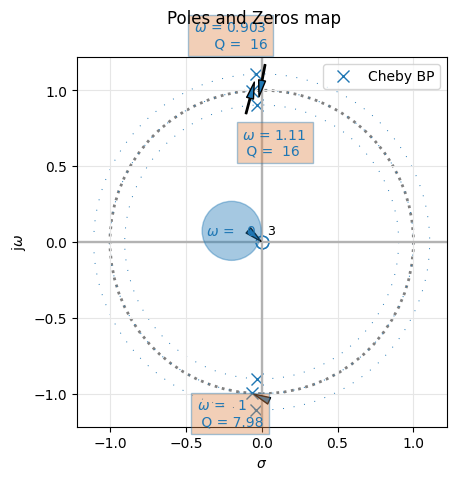

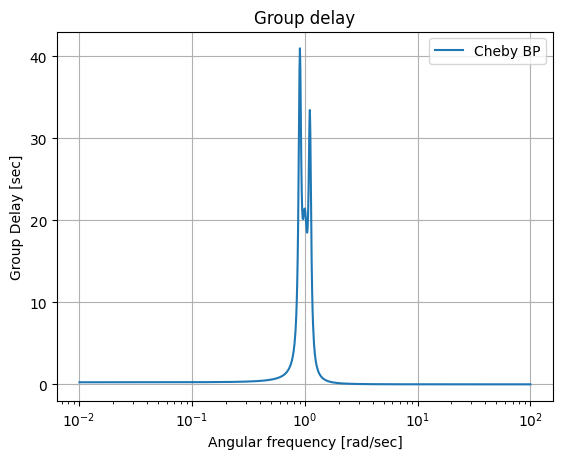

In [3]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss

from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS


#----------------------Definicion de las variables---------------------

xi = 0.35
n = 3
rp = 0.5

#---------------------------Definicion de HLP--------------------------

[zLP, pLP, kLP] = ss.cheb1ap(n, rp)

[numLP, denLP] = ss.zpk2tf(zLP, pLP, kLP)

LP_sos = tf2sos_analog(numLP, denLP)

HLP = TransferFunction(numLP, denLP)

#-------------------------Transformación LP-BP-------------------------

[numBP, denBP] = ss.lp2bp(numLP, denLP, 1, 1/5)

[zBP, pBP, kBP] = ss.tf2zpk(numBP, denBP)

BP_sos = tf2sos_analog(numBP, denBP)

HBP = TransferFunction(numBP, denBP)

#-----------------------------Visualizacion----------------------------

# -------- LP --------
print("HLP(s): ")
pretty_print_SOS(LP_sos, mode='omegayq')
print("zLP = ", zLP, "\n", "pLP = ", pLP, "\n", "kLP =", kLP)
analyze_sys(HLP, "Cheby LP")

print("\n")

# -------- BP --------
print("HBP(s): ")
pretty_print_SOS(BP_sos, mode='omegayq')
print("zBP = ", zBP, "\n", "pBP = ", pBP, "\n", "kBP =", kBP)
analyze_sys(HBP, "Cheby BP", same_figs=False)


# Implementación pasiva 

A la hora de realizar la implementación pasiva, surgió la dificultad de la ganancia ya que en una implementación pasiva pura, unicamente se podría atenuar. Es por eso que decidimos plantarlo sin ningun tipo de ganancia y 

# Simulación del circuito en LTSpice pasivo

Se realizó la simulación en LTSpice para corroborar los resultados obtenidos. A continuación se muestran el circuito y su transferencia. 

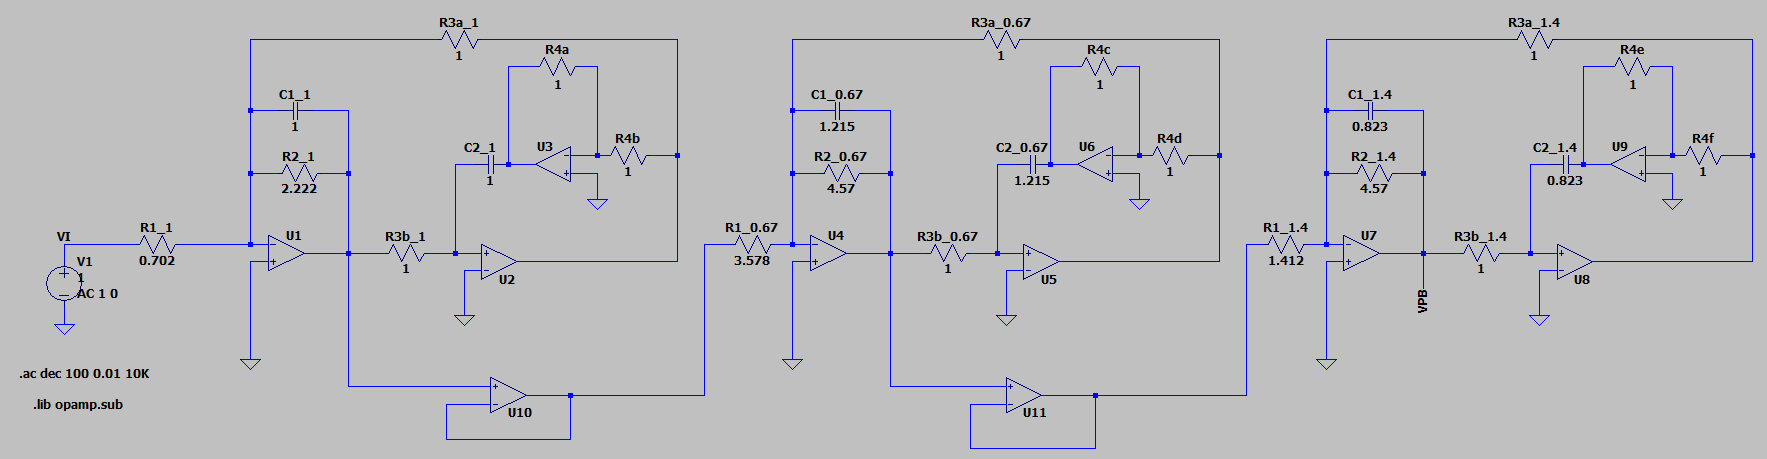

Se destacan los puntos importantes con el cursor:

$|T(\omega = 2\pi fp1)| = 7,087dB$, verifica que $\alpha_{max} < 3db$ 

$|T(\omega = 2\pi fp2)| = 7,10dB$,  verifica que $\alpha_{max} < 3db$  

Tambien es importante destacar que $|T(\omega = 1)| = 9.84dB$ 

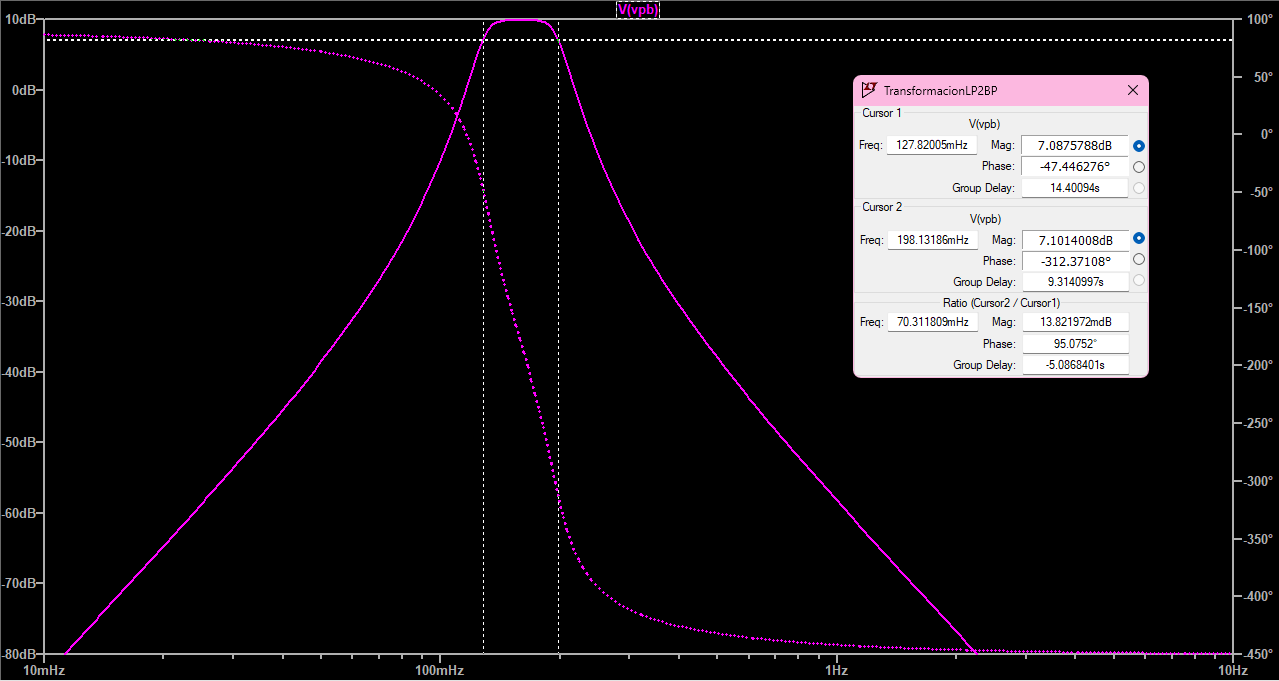

$|T(\omega = 2\pi fs1)| = -10,16dB$,  verifica que $\alpha_{min} > 20db$

$|T(\omega = 2\pi fs2)| = -10256dB$,  verifica que $\alpha_{min} > 20db$

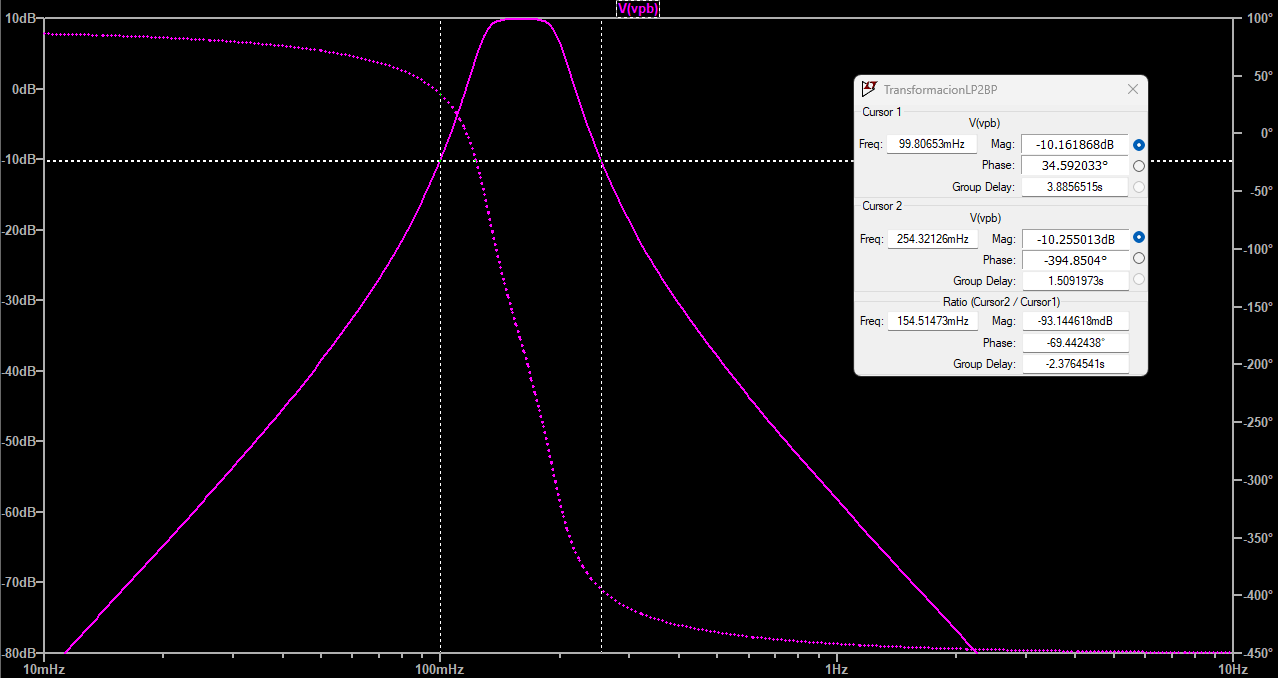


# Simulación en LTSpice del circuito activo

Para hacer la simulación activa, se propuso un a = 0.6035 para cumplir con la $K_{H1} = 1.205$ 

Sin embargo, $K_{H2} \wedge K_{H3} > 2$ por lo tanto no se podria implementar de la misma manera que $K_{H1}$, se propuso un b = 0.5 tal que la ganancia de H2(s) y H3(s) sea 0dB y se colocó un ampificador a la salida para que gane 9,75 veces

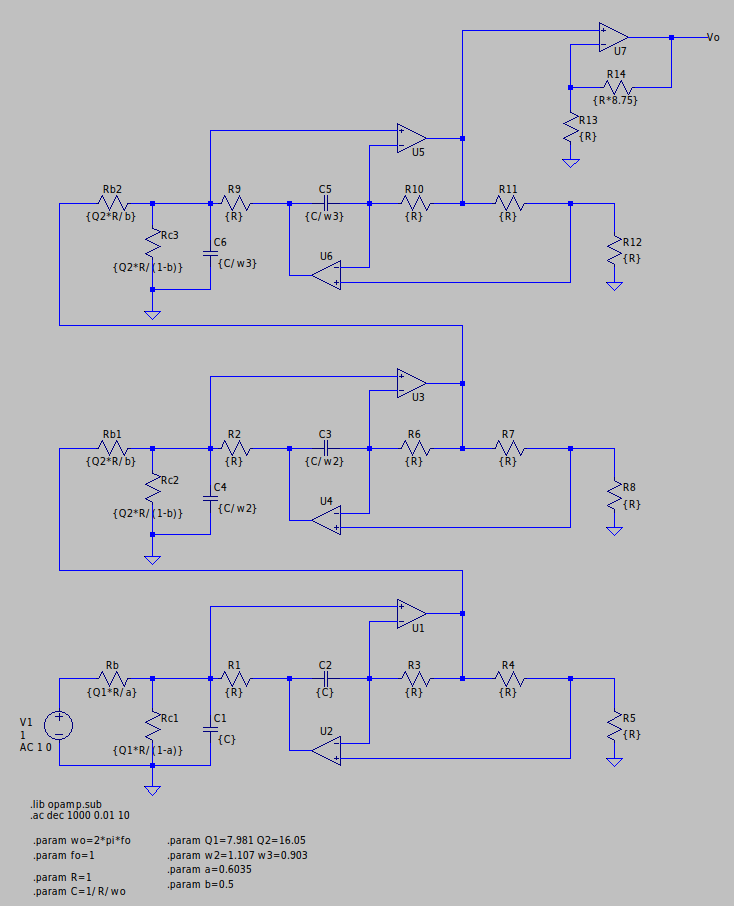 